# Auditory Sound Processing - Part II: Time Dependence

author: Thomas Haslwanter, date: Dec-2019

In [1]:
# Standard packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

# Special imports
from scipy.io.wavfile import read
from IPython.display import Audio, display

In [2]:
# Same setup as Part I
audioDir = r'data\sounds'


def pSpect(data, rate):
    '''Calculation of power spectrum and corresponding frequencies'''
    
    nData = len(data)
    fftData = np.fft.fft(data)
    PowerSpect = fftData * fftData.conj() / nData
    freq = np.arange(nData) * float(rate) / nData
    
    return (np.real(PowerSpect), freq)

# Human Voice
<img src='data/images/Pharyngeal_flap_procedures3.gif' style="width: 200px;"/>

## A Vowel

In [3]:
soundFile = os.path.join(audioDir, 'e_vowel.wav')
Audio(url=soundFile, autoplay=False)

In [4]:
rate, data = read(soundFile)
data.dtype

dtype('int16')

**Watch out with the datatype**, as overflow behavior is different from language to language!

In [5]:
print(np.uint8(255))
print(np.uint8(255+2))

255
1


Text(0.5, 1.0, 'First 1000 signal values')

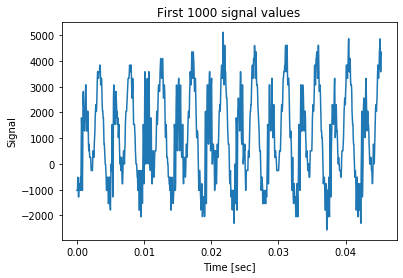

In [6]:
# Show the first 1000 data samples
time = np.arange(len(data))/rate
plt.plot(time[:1000], data[:1000])
plt.xlabel('Time [sec]')
plt.ylabel('Signal')
plt.title('First 1000 signal values')

### Formants
**Formants** are defined as *"A range of frequencies [of a complex sound] in which there is an absolute or relative maximum in the sound spectrum."*

The vibrations of the vocal cords determine the base oscillation. *Formats* indicate maxima of for the resonances of the higher harmonics, and the location of the first two formats determine if the vowel is an "a", "e", "i", "o", or "u".

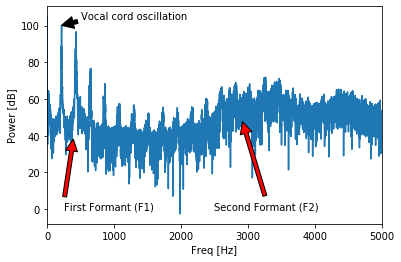

In [7]:
# Read in the data, and calculate and plot the power-spectrum
rate, data = read(soundFile)
power, freq = pSpect(data, rate)
plt.plot(freq, 10*np.log10(power))

# Format the plot
plt.xlim(0, 5000)
plt.xlabel('Freq [Hz]')
plt.ylabel('Power [dB]')

# Label important features of the plot
def label(axis, text, position, textLocation, color):
    axis.annotate(text, xy=position, xycoords='data',
                xytext=textLocation, textcoords='axes fraction',
                arrowprops=dict(facecolor=color, shrink=0.05),
                horizontalalignment='left', verticalalignment='top')

label(plt.gca(), text='Vocal cord oscillation', position=(200,100), textLocation=(0.1, 0.98), color='black')
label(plt.gca(), text='First Formant (F1)', position=(400,40), textLocation=(0.05, 0.1), color='red')
label(plt.gca(), text='Second Formant (F2)', position=(2900,50), textLocation=(0.5, 0.1), color='red')

#out_file = 'Formants.jpg'
#plt.savefig(out_file, dpi=300)
#print('Image saved to {0}'.format(out_file))

## All Vowels
The next file contains *all* vowels:

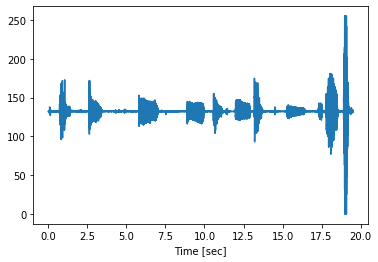

In [8]:
soundFile = os.path.join(audioDir, 'vowels.wav')
rate, data = read(soundFile)
t = np.arange(len(data))/rate

# Show the data
plt.plot(t,data)
plt.xlabel('Time [sec]')

# Play them
Audio(url=soundFile, autoplay=False)

But with such a long sound-file, we don't want to know the frequency context of the *whole* file at once: we would like to obtain the frequency components *as a function of time*.
This can be done with a *spectrogram*:

### Spectrogram

C:\Programs\WPy64-3740\python-3.7.4.amd64\lib\site-packages\matplotlib\axes\_axes.py:7739: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


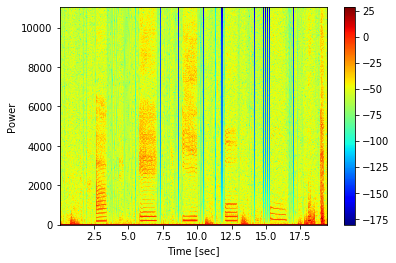

In [9]:
from matplotlib.pyplot import specgram
from matplotlib import cm
_ = specgram(data, NFFT=1024, Fs=rate, cmap=cm.jet)
plt.xlabel('Time [sec]')
plt.ylabel('Power')
plt.colorbar()

#out_file = 'Vowels.jpg'
#plt.savefig(out_file, dpi=300)
#print('Image saved to {0}'.format(out_file))

# To be frank, the Python Warnings stun me a bit ... :(

To obtain the time dependence, each time-point (on the x-axis) in *spectrogram* contains the power-spectrum (y-axis) from the corresponding *time-window* (see Figure below), with the amplitude of the power spectrum represented by the corresponding color.

<img src='data/images/sound.png' style="width: 500px;"/>

#### Detour: Shorter Timewindow -> wider Powerspectrum
Link to [Soundproc_2b_Windowing](Soundproc_2b_Windowing.ipynb)

Note the effect of the width of the sampling window:

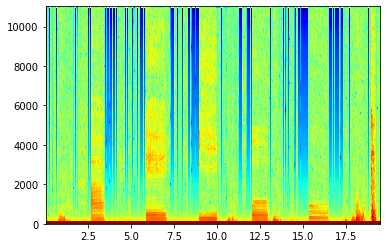

In [10]:
_ = specgram(data, NFFT=256, Fs=rate, cmap=cm.jet)

## Bandpass

A *bandpass* can be implemented in two ways:

* through an FFT, with selection of the corresponding components
* through an IIR-filter

<img src='data/images/Simulation_CI.jpg' width=500>

[9_Soundproc_Basics](9_Soundproc_Basics.ipynb)<img src="data/images/Backward.png" align="middle">

<img src="data/images/CCA_40.png">
*Auditory Sound Processing*  is licensed under a Creative Commons Attribution 4.0 International License.